# Spearman's Rank Correlation

In Chapter 1: Describing Data we looked at Spearman's Rank correlation coefficient, which is a robust correlation based on ranks.

**If you are unsure about correlation coefficients, please revisit the page on correlation in Chapter 1: Describing Data**

In this section on rank-based tests, we revisit Spearman's $r$ and see how to get a $p$-value for it using `scipy.stats`

The reasons for using Spearman'srank correlation rather than Pearson's correlation are recapped there.

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Load the data

Let's use the CO2 data discussed in the section on correlation in Chapter 1: Describing Data. The dataset contains GDP (weath) and carbon emissions per person for 164 countries.

In [2]:
carbon = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/CO2vGDP.csv')
carbon

,Country,CO2,GDP,population
0,Afghanistan,0.2245,1934.555054,36686788
1,Albania,1.6422,11104.166020,2877019
2,Algeria,3.8241,14228.025390,41927008
3,Angola,0.7912,7771.441895,31273538
4,Argentina,4.0824,18556.382810,44413592
...,...,...,...,...
159,Venezuela,4.1602,10709.950200,29825652
160,Vietnam,2.3415,6814.142090,94914328
161,Yemen,0.3503,2284.889893,30790514
162,Zambia,0.4215,3534.033691,17835898


## Plot the data

From a scatter plot, we can see that the data are unsuitable for Pearson's correlation (please check the notes for Correlation in the section **Describing Data** if unsure why)

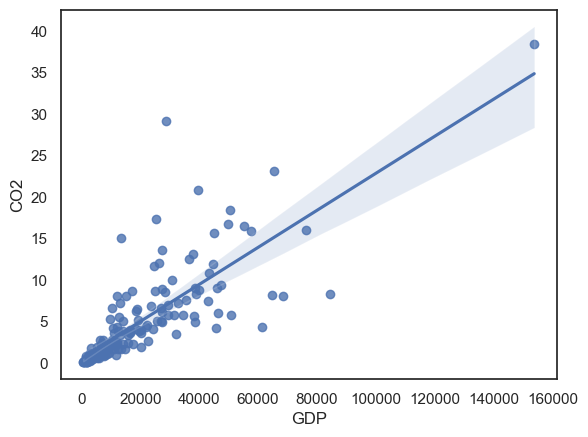

In [3]:
sns.regplot(data=carbon, x='GDP', y='CO2')
plt.show()

## Calculating correlation

We have seen that we can get the correlation ($r$-value) between all pairs of columns using a `pandas` function `df.corr()` as follows:

In [4]:
carbon.corr(numeric_only=True, method='spearman')

,CO2,GDP,population
CO2,1.000000,0.914369,-0.098554
GDP,0.914369,1.000000,-0.122920
population,-0.098554,-0.122920,1.000000


Or between two particular columns like this:

In [5]:
carbon.GDP.corr(carbon.CO2, method='spearman')

0.9143688871356085

However, the `pandas` function `df.corr()` doesn't calculate the significance of the correlation. We could calculate it using a permutation test (as last week) but we can also use a built in function from `scipy.stats`, called `stats.spearmanr`

In [6]:
stats.spearmanr(carbon.GDP, carbon.CO2)

SignificanceResult(statistic=0.9143688871356085, pvalue=1.6676605949335523e-65)

This gives us the correlation coefficient $r=0.79$ (which is a very strong correlation) and the $p$-value $4.9 \times 10^{-37}$ (it is highliy significant)

### Note on Hypotheses

For Pearson's correlation (the 'standard' correlation coefficient, calculated on actual data values rather than ranks) we might express our null and alternative hypotheses as follows:

$\mathcal{H_o}$ There is no linear relationship between GDP and CO2 emissions per capita

$\mathcal{H_a}$ There is a positive linear relationship between GDP and CO2 emissions per capita
* in plain English, CO2 emissions are proportional to GDP

(remember from the section on correlation in **Describing Data** that Pearson's correlation assumes that the relationship, if there is one, is a straight line)

For Spearman's rank correlation coefficient, our null and alternative hypotheses are slightly different:

$\mathcal{H_o}$ There is no relationship between GDP and CO2 emissions per capita

$\mathcal{H_a}$ There is a relationship between CO2 and GDP rank
* in plain English, richer a country is, the higher its carbon emissions